In [1]:
print("hello bhams")

hello bhams


In [2]:
print(45)

45


In [4]:
%pip install -r requirements.txt

  Using cached langchain-0.3.25-py3-none-any.whl.metadata (7.8 kB)
  Using cached langgraph-0.4.5-py3-none-any.whl.metadata (7.3 kB)
  Using cached langchain_core-0.3.60-py3-none-any.whl.metadata (5.8 kB)
  Using cached langchain_community-0.3.24-py3-none-any.whl.metadata (2.5 kB)
  Using cached langchain_groq-0.3.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached arxiv-2.2.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached wikipedia-1.4.0.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached langchain_text_splitters-0.3.8-py3-none-any.whl.metadata (1.9 kB)
  Using cached langsmith-0.3.42-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.4-py3-none-any.whl.metadata (66 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached typing_inspection-0.4.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached langgraph_checkpoint-2.0.26-py3-none-any.whl.metadata (4.6 kB

In [5]:
# Tools  
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools.wikipedia.tool import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [6]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query Arxiv papers")     # making the tools required using the API wrappers
print(arxiv.name)

arxiv


In [7]:
arxiv.invoke("Plasticity as the Mirror of Empowerment")

'Published: 2025-05-15\nTitle: Plasticity as the Mirror of Empowerment\nAuthors: David Abel, Michael Bowling, André Barreto, Will Dabney, Shi Dong, Steven Hansen, Anna Harutyunyan, Khimya Khetarpal, Clare Lyle, Razvan Pascanu, Georgios Piliouras, Doina Precup, Jonathan Richens, Mark Rowland, Tom Schaul, Satinder Singh\nSummary: Agents are minimally entities that are influenced by their past observations\nand act to influence future observations. This latter capacity is captured by\nempowerment, which '

In [8]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki, description="Query Wikipedia articles")   # making the wiki tools using API too
print(wiki.name)

wikipedia


In [9]:
wiki.invoke("Dislexia")

'Page: Dyslexia\nSummary: Dyslexia, previously known as word blindness, is a learning disability that affects either reading or writing. Different people are affected to different degrees. Problems may include difficulties in spelling words, reading quickly, writing words, "sounding out" words in the head, pronouncing words when reading aloud and understanding what one reads. Often these difficulties are first noticed at school. The difficulties are involuntary, and people with this disorder have '

In [10]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")   # Tavily is more like a search engine for answering questions.like google, using its API
os.environ["GROQ_API_KEY"] =os.getenv("GROQ_API_KEY") 

In [11]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [12]:
tavily.invoke("what is the latest news about deepseek?")

[{'title': 'DeepSeek (深度求索): Latest News and Updates',
  'url': 'https://www.scmp.com/topics/deepseek',
  'content': 'The latest speculation includes R2’s imminent launch and the new benchmarks that it set in terms of cost-efficiency and performance.\n\nAkeso shares slump despite second China approval for lung cancer drug\n\nChinese regulator grants second approval for lung cancer drug ivonescimab, which has outperformed Merck’s Keytruda in phase three trial.\n\nBaidu offers new AI models at lower cost than DeepSeek’s products [...] The technology is already ‘providing new ideas and approaches’ according to the lead designer at the Shenyang Aircraft Design Institute.\n\nDeepSeek’s new maths-solving model is generating buzz, but mostly about R2\n\nThe Prover-V2 release has captured attention online, with many on social media wondering what it means for the start-up’s next reasoning model.\n\nAlibaba’s Qwen3 AI model family helps narrow US-China tech gap: analysts [...] Chinese customers

In [13]:
# Combining all these tools in the list
tools = [arxiv, wiki, tavily]

In [14]:
# Initialize the LLM model

from langchain_groq import ChatGroq

llm = ChatGroq(                                     #LLM model used here is groq's ChatGroq qwen-qwq-32b 
    model="qwen-qwq-32b"
)

In [15]:
llm.invoke("What is llm?")

AIMessage(content='\n<think>\nOkay, so the user is asking, "What is LLM?" Alright, let me start by recalling what I know. LLM stands for Large Language Model. But wait, maybe I should double-check that. Hmm, yes, I think that\'s right. So, first, I need to explain what a language model is. A language model is a type of AI that\'s designed to understand and generate human language. But specifically, LLMs are the big ones, right? They have a lot of parameters. Parameters in machine learning terms are the variables the model learns from the data. So, LLMs have millions or billions of them.\n\nNow, why are they called "large"? Probably because of the vast amount of data they\'re trained on. They use huge datasets from the internet, books, articles, etc. That\'s how they learn to generate coherent text. Examples of LLMs include models like GPT, BERT, and others from companies like OpenAI, Google, and Meta. Wait, but the user might not know those names, so maybe I should mention a few exampl

In [16]:
llm_with_tools = llm.bind_tools(tools=tools)

In [17]:

llm_with_tools.invoke("What is the recent news about deepseek?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_764p', 'function': {'arguments': '{"query": "recent news about DeepSeek"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 236, 'prompt_tokens': 324, 'total_tokens': 560, 'completion_time': 0.575348318, 'prompt_time': 0.020063468, 'queue_time': 0.248391862, 'total_time': 0.595411786}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6adbed92-fcef-424f-bc54-b03b72ea119c-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news about DeepSeek'}, 'id': 'call_764p', 'type': 'tool_call'}], usage_metadata={'input_tokens': 324, 'output_tokens': 236, 'total_tokens': 560})

#Similarly examples of calling arxiv and wikipedia tools

In [18]:
llm_with_tools.invoke("Give me a recent research paper on agentic ai?")     ##arxiv

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pac5', 'function': {'arguments': '{"query": "agentic AI recent"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 249, 'prompt_tokens': 326, 'total_tokens': 575, 'completion_time': 0.604717227, 'prompt_time': 0.020289803, 'queue_time': 0.25291968600000003, 'total_time': 0.62500703}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--950d0181-8022-4f29-a2df-e5a1541226eb-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'agentic AI recent'}, 'id': 'call_pac5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 326, 'output_tokens': 249, 'total_tokens': 575})

In [19]:
llm_with_tools.invoke("What is  deep Reinforcement Learning?")     ##Wikipedia

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6cwx', 'function': {'arguments': '{"query": "Deep reinforcement learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 496, 'prompt_tokens': 323, 'total_tokens': 819, 'completion_time': 1.226085092, 'prompt_time': 0.0223178, 'queue_time': 0.24610344, 'total_time': 1.248402892}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6003d4d7-a69c-4bfd-a266-06d27881504f-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Deep reinforcement learning'}, 'id': 'call_6cwx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, 'output_tokens': 496, 'total_tokens': 819})

Also in some relevant cases, the LLM can directly give the response to the user's question, instead of calling a tool.

In [20]:
llm_with_tools.invoke("how are you?")

AIMessage(content="I'm here to help you with any information or tasks you need assistance with. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 133, 'prompt_tokens': 319, 'total_tokens': 452, 'completion_time': 0.33001489, 'prompt_time': 0.024801243, 'queue_time': 0.247279557, 'total_time': 0.354816133}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'stop', 'logprobs': None}, id='run--30e3581d-600d-44f7-9bee-1c9f16a181bc-0', usage_metadata={'input_tokens': 319, 'output_tokens': 133, 'total_tokens': 452})

WORKFLOW

In [21]:
# State schema
from typing_extensions import TypedDict  
from langchain_core.messages import AnyMessage #Human Message or AI Message
from typing import Annotated  #labelling
from langgraph.graph.message import add_messages  #Reducers in langgraph

In [22]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [23]:
# Entire Chatbot using LangGraph
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

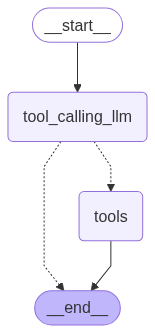

In [24]:
# node definition

def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

#Build the graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #If the latest message (result) from assistant is a tool call -> tool condition routes to tools
    #If the latest message (result) from assistant is not a tool call -> tools condition routes to tool_calling_llm
    tools_condition,
)

builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
messages = graph.invoke({"messages": "2505.10468"})     
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

2505.10468
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_xbfv)
 Call ID: call_xbfv
  Args:
    query: 2505.10468
================================= Tool Message =================================
Name: arxiv

Published: 2025-05-15
Title: AI Agents vs. Agentic AI: A Conceptual Taxonomy, Applications and Challenge
Authors: Ranjan Sapkota, Konstantinos I. Roumeliotis, Manoj Karkee
Summary: This study critically distinguishes between AI Agents and Agentic AI,
offering a structured conceptual taxonomy, application mapping, and challenge
analysis to clarify their divergent design philosophies and capabilities. We
begin by outlining the search strategy and foundational definitions,
characterizing AI Agents 


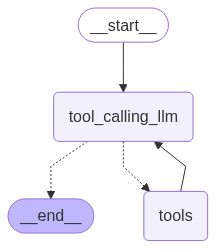

In [26]:
# node definition

def tool_calling_llm(state:State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

#Build the graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #If the latest message (result) from assistant is a tool call -> tool condition routes to tools
    #If the latest message (result) from assistant is not a tool call -> tools condition routes to tool_calling_llm
    tools_condition,
)

builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View

display(Image(graph.get_graph().draw_mermaid_png()))

In [27]:
messages = graph.invoke({"messages": "What is the recent deepseek news and then please tell me the recent research paper on agentic ai?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent deepseek news and then please tell me the recent research paper on agentic ai?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_0b5j)
 Call ID: call_0b5j
  Args:
    query: Recent news about DeepSeek AI
  arxiv (call_a739)
 Call ID: call_a739
  Args:
    query: agentic AI
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "DeepSeek News | Today's Latest Stories - Reuters", "url": "https://www.reuters.com/technology/deepseek/", "content": "Latest Stories ; January 30, 2025. Resource-poor Japan was girding for an AI energy surge. DeepSeek raised the stakes. ; January 30, 2025. Chinese state-linked", "score": 0.8573986}, {"title": "DeepSeek's Latest Breakthrough Is Redefining AI Race - CSIS", "url": "https://www.csis.org/analysis/deepseek

ReAct framework
This last used workflow is the demonstration of the ReAct(Reasoning and Acting) framework of LLM models. Here the tool_calling_llm node will reason first and identify that if it needs to call a tool and how many contexts are there in the provided question or query. Then it will call the appropriate tool(s) based on the identified contexts and provide the final response. This helps in improving the LLM's efficiency and accuracy.

multiple tools like arxiv(for research), wikipedia(info),tavily(search engine)  etc are combined with the llm model qwen of chat groq . llm will reason the query , and calls the respective tools by itself and give a single response.